In [195]:
participant_id = "P3"

In [196]:
%load_ext autoreload
%autoreload 2
from hireverse.utils.utils import *

video_file_path = os.path.join(BASE_DIR, "data/raw/videos", f"{participant_id}.avi")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
from hireverse.utils.face_analyzer import FaceAnalyzer
from hireverse.schemas.frame import Frame
import numpy as np

face_analyzer = FaceAnalyzer()
frames = face_analyzer.get_video_frames(participant_id="randomId",video_path= video_file_path, target_fps=20,)

In [198]:
frames = frames[:40]

In [199]:
filtered_frames: List[Frame] = []
for frame in frames:
    frame.facial_landmarks_obj = face_analyzer.process_image_results(frame.image)
    if frame.facial_landmarks_obj:
        frame.facial_landmarks = frame.facial_landmarks_obj.landmark
        filtered_frames.append(frame)

frames = filtered_frames

In [200]:
for frame in frames:
    new_width = 640
    if frame.image.shape[1]  != new_width:
        frame.resize(new_width=new_width)

In [201]:
for frame in frames:
    frame.align_face_with_mediapipe_landmarks()

In [202]:
valid_frames = []
for frame in frames:
    frame.face = face_analyzer.get_face_coordinates(frame.facial_landmarks, frame.image)
    x, y, w, h = frame.face
    cropped_face_image = frame.get_cropped_image(x, y, x + w, y + h)
    
    if cropped_face_image is not None:
        frame.image = cropped_face_image
        valid_frames.append(frame)

frames = valid_frames

In [203]:
import cv2

for frame in frames:
    frame.image =  cv2.cvtColor(frame.image, cv2.COLOR_BGR2GRAY)

In [204]:
for frame in frames:
    frame.image = np.clip(frame.image.astype('float32') / 255.0, 0.0, 1.0)

In [205]:
for frame in frames:
    frame.resize(new_width=640, new_height=640)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Laplacian variance: 1.88
true


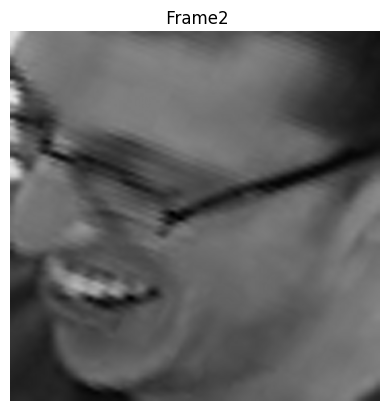

Laplacian variance: 2.21
true


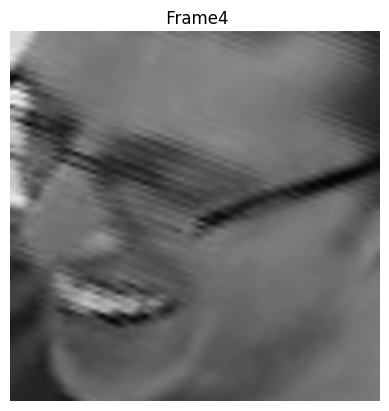

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Laplacian variance: 2.37
true


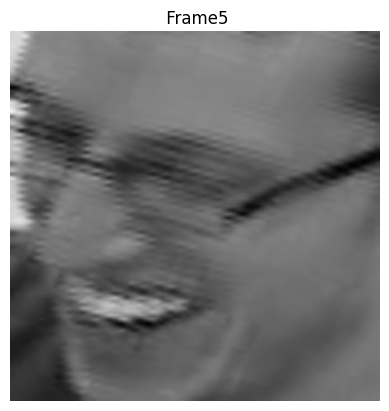

Laplacian variance: 2.41
true


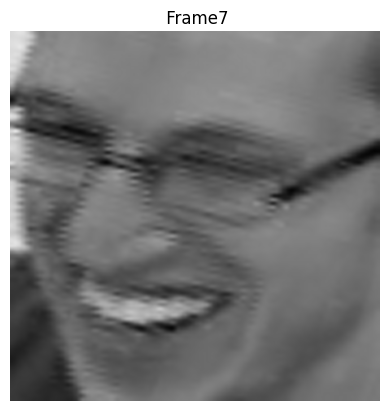

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Laplacian variance: 2.25
true


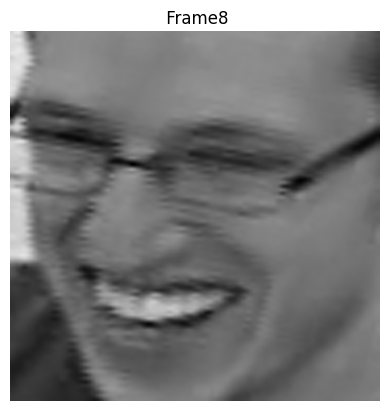

Laplacian variance: 1.79
true


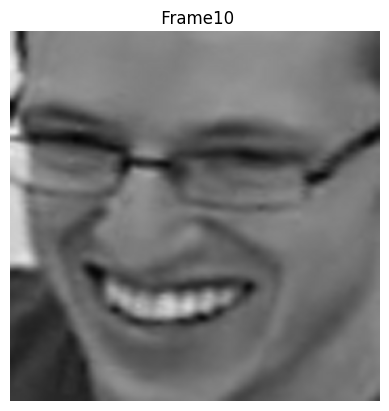

Laplacian variance: 1.81
true


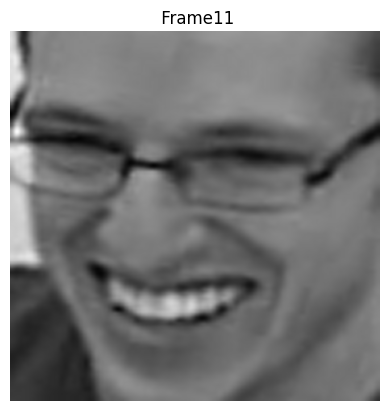

Laplacian variance: 1.92
true


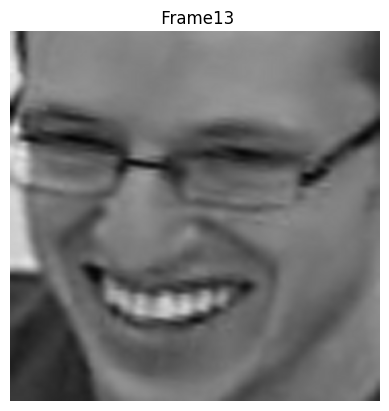

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Laplacian variance: 1.93
true


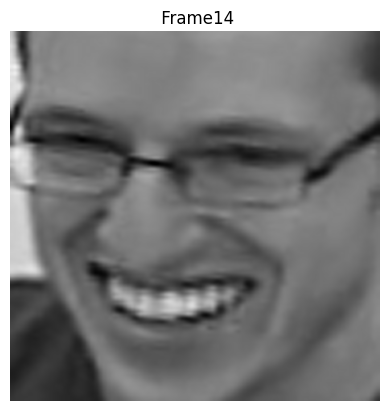

Laplacian variance: 1.94
true


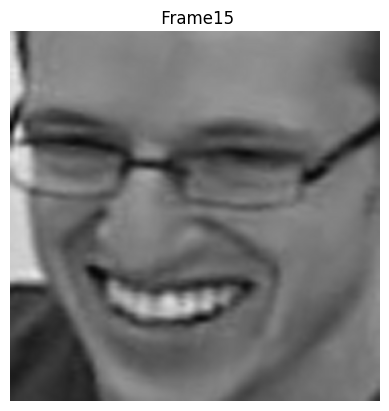

Laplacian variance: 1.97
true


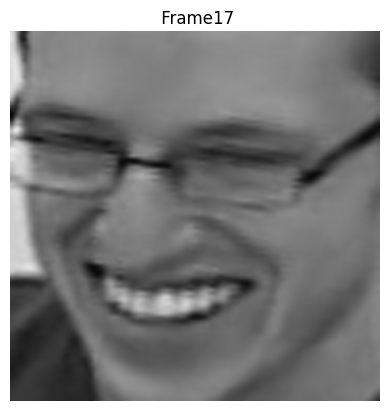

Laplacian variance: 2.07
true


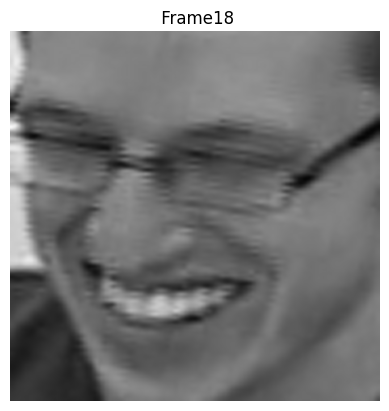

Laplacian variance: 2.16
true


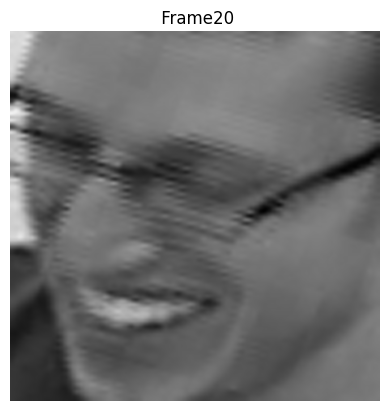

Laplacian variance: 2.07
true


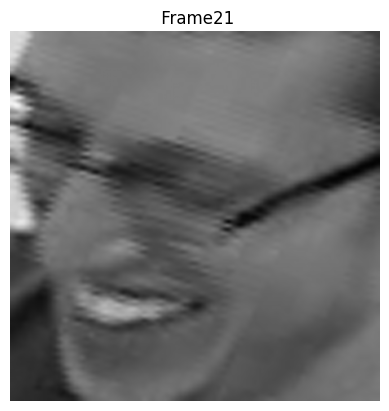

In [ ]:
import numpy as np


for frame in frames:
    frame.reset_drawable_image()
    # frame.draw_face_border()
    # frame.draw_facial_landmarks()
    # if frame.facial_landmarks:
    #     frame.draw_circle_at_facial_landmark(frame.facial_landmarks[10], frame.facial_landmarks[152])
    frame.display()